# Lab 1 - Install OpenCV

reference:
 - https://demystifymachinelearning.wordpress.com/2018/08/30/installing-opencv-on-windows-using-anaconda/
 - https://cv-tricks.com/how-to/installation-of-opencv-4-1-0-in-windows-10-from-source/
 - https://docs.opencv.org/master/d5/de5/tutorial_py_setup_in_windows.html
 - https://medium.com/@kswalawage/install-python-and-jupyter-notebook-to-windows-10-64-bit-66db782e1d02
 - https://cuda-chen.github.io/programming/image%20processing/2020/01/21/vscode-with-opencv-cpp-on-windows10-explained.html
 - https://www.pranav.ai/cplusplus-for-jupyter
 - https://learnopencv.com/tag/xeus-cling/
 - https://sourceforge.net/projects/opencvlibrary/files/opencv-win/
 - https://www.youtube.com/watch?v=FCzMpHWUUKg

## Install OpenCV (Windows)

1. Download latest OpenCV release from __[OpenCV site](https://opencv.org/releases/)__ site
   - Click on the **Windows** of the latest version on openCV.
   - Extract it to the desire location: In this step, I choose <code>C:\opencv</code>
2. Clone OpenCV-Contribute at __[GitHub](https://github.com/opencv/opencv_contrib.git)__, and extract it at the same location.

<img src="img/lab01-1.PNG" width="400"/>

3. Install Visual Studio Community from __[here](https://visualstudio.microsoft.com/vs/community/)__
4. While setting up visual studio installation, select 2 workloads as below:
   - Python Development
   - Desktop Development with C++

<img src="img/lab01-2.PNG" width="800"/>

5. Go to System Properties $\rightarrow$ *Environment Variables*

   **Note**: In Windows10, you can go type "Environment Variables" to search System Properties
   - At the User variables $\rightarrow$ Path tab  select $\rightarrow$ *Edit..*
   - Press *New* and input
     - Variable value: <code>C:\opencv\opencv\build\x64\vc15\bin</code> (Your location)
   
<img src="img/lab01-3.PNG" width="600"/>
   
7. After installation done, the Visual Studio require restart. After restart, open Visual studio
8. Create a new project as **Console App** (C++)

<img src="img/lab01-4.PNG" width="800"/>

### Setting OpenCV in Visual studio C++

1. Set platform target to x64

<img src="img/lab01-5.PNG" width="200"/>

2. Go to *Project* $\rightarrow$ \[project name\] Properties

<img src="img/lab01-6.PNG" width="300"/>

3. At VC++ Directories tab $\rightarrow$ Include Directories $\rightarrow$ click Edit and add opencv/include path

<img src="img/lab01-7.PNG" width="600"/>

<img src="img/lab01-8.PNG" width="400"/>

4. At VC++ Directories tab $\rightarrow$ Library Directories $\rightarrow$ click Edit and add opencv/lib path

<img src="img/lab01-9.PNG" width="600"/>

<img src="img/lab01-10.PNG" width="400"/>

5. At Linker/Input tab $\rightarrow$ Additional Dependencies $\rightarrow$ click Edit and add <code>opencv_worldxxxd.lib</code> file

   **Note**: You can see the library file name in <code>C:\opencv\opencv\build\x64\vc15\lib</code>

<img src="img/lab01-11.PNG" width="600"/>

<img src="img/lab01-12.PNG" width="400"/>

6. Try to write the code as below:

   **Note**: To run as debug, press F5. To run without debugging, press Ctrl+F5

In [ ]:
#include <opencv2/core/core.hpp>
#include <opencv2/highgui/highgui.hpp>
#include <opencv2/imgproc.hpp>
#include <iostream>

using namespace cv;
using namespace std;

int main()
{
    Mat image = Mat::zeros(300, 600, CV_8UC3);
    circle(image, Point(250, 150), 100, Scalar(0, 255, 128), -100);
    circle(image, Point(350, 150), 100, Scalar(255, 255, 255), -100);
    imshow("Display Window", image);
    waitKey(0);
    return 0;
}

See the result!

<img src="img/lab01-14.PNG" width="400"/>

### Tip: When it does not work

If you found this error:

<img src="img/lab01-13.PNG" width="400"/>

The easiest way to solve the problem is copy <code>opencv_world452d.dll</code> from <code>C:\opencv\opencv\build\x64\vc15\bin</code> into <code>\[your project path\]/x64/Debug</code>

### Method 2: Install OpenCV Python (Visual Studio Community)

1. Create a python project in Visual studio
2. At the solution explorer, right click at **Python 3.x** $\rightarrow$ Manage Python package

<img src="img/lab01-15.PNG" width="400"/>

3. Select Package PyPI $\rightarrow$ type **opencv-python** $\rightarrow$ double click at *install opencv-python*

<img src="img/lab01-16.PNG" width="400"/>

4. Go to **Tools** $\rightarrow$ **Python** $\rightarrow$ *Python Interactive Wimdow*
5. Try to type anything of opencv code

<img src="img/lab01-17.PNG" width="400"/>

In [ ]:
import cv2

print(cv2.__version__)

Try to write python code in .py file (same result as C++)

In [ ]:
import cv2
import numpy as np

print(cv2.__version__)
size = 300, 600, 3
image = np.zeros(size, dtype=np.uint8)
cv2.circle(image, (250,150), 100, (0,255,128), -100)
cv2.circle(image, (350,150), 100, (255,255,255), -100)
cv2.imshow("", image)
cv2.waitKey(0)

### Method 2: Install OpenCV (Visual Studio Code)

#### Python

1. Download Python from Microsoft Store (***Recommend***:by type **python** in command line) or __[Python website](https://www.python.org/downloads/)__ and install it.
2. Set **PythonXX** path and **PythonXX/Scripts** path to environment variable (No need for microsoft store install)
   - **PythonXX** path - <code>C:\Users\\[username\]\AppData\Local\Programs\Python\Python39</code>
   - **PythonXX/Scripts** path - <code>C:\Users\\[username\]\AppData\Local\Programs\Python\Python39\Scripts</code>
3. Download Visual Studio Code from __[here](https://code.visualstudio.com/download)__ and install it.
4. Open command line:
   - Check python version <code>python --version</code>
   - Install virtual environment <code>pip install virtualenv</code>
   - Create a virtual environment called opencv <code>python -m virtualenv opencv</code>
   - Go to opencv environment, activate the virtual environment.
     - <code>cd opencv/Scripts</code>
     - <code>activate.bat</code>
   - Install numpy <code>pip install numpy</code>
   - Install MatPlotLib <code>pip install matplotlib</code>
   - Install OpenCV <code>pip install opencv-python</code>
   - Install Jupyter <code>python -m pip install jupyter</code>
   - Try to open Jupyter Notebook <code>jupyter notebook</code>
   - Cancel Jupyter notebook using Ctrl-C
5. Open Visual Studio Code and select Python interpreter (at left bottom of the screen).

<img src="img/lab01-18.PNG" width="800"/>

6. Try to create a jupyter program or python program.

In [1]:
# For jupyter notebook, you cannot use imshow directly. Please use pyplot to show image.

import cv2
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)
size = 300, 600, 3
image = np.zeros(size, dtype=np.uint8)
cv2.circle(image, (250,150), 100, (0,255,128), -100)
cv2.circle(image, (350,150), 100, (255,255,255), -100)

4.5.2


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

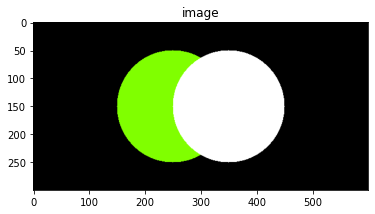

In [4]:
def imshow(image):
    img2 = image[:,:,::-1] #change color from BGR color to RGB color
    plt.imshow(img2)
    plt.title('image')
    plt.show()

imshow(image)

#### C++

1. After install VS code, Install VS Code C/C++ extensions (ms-vscode.cpptools)

<img src="img/lab01-19.PNG" width="800"/>

2. Download and install MinGW-w64 from __[here](https://sourceforge.net/projects/mingw-w64/files/Toolchains%20targetting%20Win32/Personal%20Builds/mingw-builds/installer/mingw-w64-install.exe/download)__. Setting while install as:
   - Version 8.1.0
   - Architecture x86-64
   - posix
   - Exception seh
   - Build revision 0
   - Set path of compiler as: <code>C:\mingw-w64\x86_64-8.1.0-posix-seh-rt_v6-rev0</code>
   
<img src="img/lab01-20.PNG" width="600"/>

3. Download __[OpenCV MinGW](https://github.com/huihut/OpenCV-MinGW-Build)__ in zip file. unzip it and put into <code>C:\opencv\OpenCV-MinGW-Build-OpenCV-4.5.2-x64</code>

4. Go to System Properties $\rightarrow$ *Environment Variables*

   **Note**: In Windows10, you can go type "Environment Variables" to search System Properties
   - At the User variables $\rightarrow$ Path tab  select $\rightarrow$ *Edit..*
   - Press *New* and input
     - Binaries OpenCV path: <code>C:\opencv\OpenCV-MinGW-Build-OpenCV-4.5.2-x64\x64\mingw\bin</code>
     - Binaries MinGW path: <code>C:\mingw-w64\x86_64-8.1.0-posix-seh-rt_v6-rev0\mingw64\bin</code>
     
<img src="img/lab01-21.PNG" width="600"/>

   **Note**: If you don't do this step, you will find *gdb* error in last step

5. Configure file in vscode

   5.1. Create a workspace in vs code.
   
   5.2. Create a main.cpp and try to run it.
   
   5.3. in folder .vscode, you will see <code>tasks.json</code>, <code>launch.json</code>, and <code>c_cpp_properties.json</code>. The code will be looked like __[repo](https://github.com/Cuda-Chen/opencv-config-with-vscode)__

<img src="img/lab01-22.PNG" width="480"/>

   5.4. Modify all 3 files as below (You can copy)

### tasks.json

<code>
{
    "tasks": [
        {
            "type": "cppbuild",
            "label": "C/C++: g++.exe build active file",
            "command": "C:\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin\\g++.exe",
            "args": [
                "-g",
                "${file}",
                "-o",
                "${fileDirname}\\${fileBasenameNoExtension}.exe",
                "-I","C:\\opencv\\OpenCV-MinGW-Build-OpenCV-4.5.2-x64\\include",
                "-L","C:\\opencv\\OpenCV-MinGW-Build-OpenCV-4.5.2-x64\\x64\\mingw\\bin",                
                "-l","libopencv_calib3d452",
                "-l","libopencv_core452",
                "-l","libopencv_dnn452",
                "-l","libopencv_features2d452",
                "-l","libopencv_flann452",
                "-l","libopencv_highgui452",
                "-l","libopencv_imgcodecs452",
                "-l","libopencv_imgproc452",
                "-l","libopencv_ml452",
                "-l","libopencv_objdetect452",
                "-l","libopencv_photo452",
                "-l","libopencv_stitching452",
                "-l","libopencv_video452",
                "-l","libopencv_videoio452"
            ],
            "options": {
                "cwd": "C:\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin"
            },
            "problemMatcher": [
                "$gcc"
            ],
            "group": {
                "kind": "build",
                "isDefault": true
            },
            "detail": "Task generated by Debugger."
        }
    ],
    "version": "2.0.0"
}
</code>

### launch.json

<code>
{
    // Use IntelliSense to learn about possible attributes.
    // Hover to view descriptions of existing attributes.
    // For more information, visit: https://go.microsoft.com/fwlink/?linkid=830387
    "version": "0.2.0",
    "configurations": [
        {
            "name": "g++.exe - Build and debug active file",
            "type": "cppdbg",
            "request": "launch",
            "program": "${fileDirname}\\${fileBasenameNoExtension}.exe",
            "args": [],
            "stopAtEntry": true,
            "cwd": "C:\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin",
            "environment": [],
            "externalConsole": false,
            "MIMode": "gdb",
            "miDebuggerPath": "C:\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin\\gdb.exe",
            "setupCommands": [
                {
                    "description": "Enable pretty-printing for gdb",
                    "text": "-enable-pretty-printing",
                    "ignoreFailures": true
                }
            ],
            "preLaunchTask": "C/C++: g++.exe build active file"
        }
    ]
}
</code>

### c_cpp_properties.json
<code>
{
    "configurations": [
        {
            "name": "Win32",
            "includePath": [
                "${workspaceFolder}/**",
                "C:\\opencv\\OpenCV-MinGW-Build-OpenCV-4.5.2-x64\\include"
            ],
            "defines": [
                "_DEBUG",
                "UNICODE",
                "_UNICODE"
            ],
            "compilerPath": "C:\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin\\gcc.exe",
            "cStandard": "c11",
            "cppStandard": "c++17",
            "intelliSenseMode": "clang-x64"
        }
    ],
    "version": 4
}
</code>

6. Write a code to test:

In [ ]:
#include <iostream>

#include <opencv2/opencv.hpp>

using namespace cv;

int main( int argc, char** argv )
{
    std::cout << "aa" << std::endl;

    Mat image = Mat::zeros(300, 600, CV_8UC3);
    circle(image, Point(250, 150), 100, Scalar(0, 255, 128), -100);
    circle(image, Point(350, 150), 100, Scalar(255, 255, 255), -100);
    imshow("Display Window", image);
    waitKey(0);
    std::cout << "bb" << std::endl;

    // In case of load image file
    std::string img = "C:\\Users\\alisa\\OneDrive\\Documents\\CPPVSCODE\\lenna.jpg";
    Mat srcImage = imread(img);
    if (!srcImage.data) {
        return 1;
    }
    imshow("srcImage", srcImage);
    waitKey(0);
    
    Mat greyMat;
    cv::cvtColor(srcImage, greyMat, COLOR_BGR2GRAY);
    imshow("greyImage", greyMat);
    waitKey(0);

    return 0;
}

### Method 3: Install OpenCV (Anaconda) - Python Only

1. Download Anaconda from __[here](https://www.anaconda.com/products/individual)__. Install it.
2. Open Anaconda Terminal as Administrator. Install openCV by using <code>pip install opencv-python</code>
3. Open Jupyter notebook and write code.

## Install OpenCV (Ubuntu 20.04)

### Setting in VS code (Python)

**You can see the same step on Installation in windows method 2**

1. Download VS code from __[here](https://code.visualstudio.com/download)__ and install it.
2. Open terminal and do step:
   - Update and Refresh Repository lists: 
     - <code>sudo apt-get update</code>
     - <code>sudo apt-get upgrade</code>
   - Install Python: <code>sudo apt-get install build-essential cmake python3-numpy python3-dev python3-tk libavcodec-dev libavformat-dev libavutil-dev libswscale-dev libavresample-dev libdc1394-dev libeigen3-dev libgtk-3-dev libvtk7-qt-dev</code>
   - Upgrade pip: <code>sudo -H pip3 install --upgrade pip</code>
   - Install virtual environment: <code>sudo -H pip3 install virtualenv</code>
   - Create virtual environment: <code>virtualenv opencv</code>
   - Activate virtual environment: <code>source opencv/bin/activate</code>
   - Install Jupyter: <code>pip install jupyter</code>
   - Install OpenCV: <code>sudo apt-get install python3-opencv</code>
   - Install OpenCV-dev: <code>sudo apt-get install libopencv-dev</code> (for C++ use)
   - Run Jupyter Notebook: <code>jupyter notebook</code>
3. Open Visual Studio Code and select Python interpreter (at left bottom of the screen).
4. Try to code OpenCV for check the error.

### Setting up OpenCV C++ in VS code

1. After setting OpenCV Python completed, open VS code.
2. Create a workspace, then go to **.vscode** folder create a file named **c_cpp_properties.json**

<img src="img/lab01-27.PNG" width="400"/>

3. input data as below
<code>
{
    "configurations": [
        {
            "name": "Win32",
            "includePath": [
                "${workspaceFolder}/**",
                "/home/alisa/anaconda3/include/opencv4/**" <<< Your opencv4 path
            ],
            "defines": [
                "_DEBUG",
                "UNICODE",
                "_UNICODE"
            ],
            "compilerPath": "/usr/bin/g++",
            "cStandard": "c11",
            "cppStandard": "c++17",
            "intelliSenseMode": "clang-x64"
        }
    ],
    "version": 4
}
</code>

<img src="img/lab01-29.PNG" width="400"/>

4. At line <code>"/home/alisa/anaconda3/include/opencv4/**"</code>, search the path yourself, and modify it.
5. Create a cpp file which has opencv code.
6. Create **Makefile** which has detail below.

<img src="img/lab01-30.PNG" width="400"/>

In [ ]:
// make file

CC = "g++"
PROJECT = CVLab  // your project name
SRC = testcpp01.cpp  // cpp file

LIBS = `pkg-config opencv4 --cflags --libs`

/$(PROJECT) : /$(SRC)
	\$(CC) \$(SRC) -o \$(PROJECT) \$(LIBS)

7. Open terminal, run <code>make</code>
8. Enable library path: <code> export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/lib/</code>
9. Run application project file <code>./CVLab</code>

<img src="img/lab01-28.PNG" width="600"/>

## Bonus: Install OpenCV C++ on Jupyter using Xeus-Cling (Ubuntu only)

This concept is used for use OpenCV C++ on Anaconda. It can be used in Jupyter only. We cannot use VS code, and it can run on Ubuntu only. (No support for Windows and Mac)

1. Download anaconda from __[here](https://www.anaconda.com/products/individual)__
2. Install conda: <code>bash Anaconda3-2020.11-Linux-x86_64.sh</code>
3. Create virtual environment: <code>conda create -n cling</code>
4. Install xeus-cling: <code>conda install xeus-cling -c conda-forge</code>
5. Install xeus: <code>conda install xeus -c conda-forge</code>
6. Activate cling environment: <code>conda activate cling</code>
7. Run Jupyter notebook: <code>jupyter notebook --notebook-dir="~/Documents"</code>

<img src="img/lab01-31.PNG" width="800"/>

### Setting up openCV C++ in Jupyter notebook

1. In terminal, Install python-opencv, numpy, and matplotlib.
2. Create a notebook by selecting C++11. In the file, you will see C++ icon

<img src="img/lab01-32.PNG" width="800"/>

3. Write code as below

In [ ]:
// modify opencv path to your path

#pragma cling add_library_path("/home/alisa/anaconda3/lib")
#pragma cling add_include_path("/home/alisa/anaconda3/include")
#pragma cling add_include_path("/home/alisa/anaconda3/include/opencv4")

#pragma cling load("/home/alisa/anaconda3/lib/libopencv_aruco.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_bgsegm.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_bioinspired.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_calib3d.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_ccalib.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_core.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_datasets.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_dnn_objdetect.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_dnn.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_dpm.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_face.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_features2d.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_flann.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_freetype.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_fuzzy.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_gapi.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_hdf.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_hfs.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_highgui.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_img_hash.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_imgcodecs.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_imgproc.so.4.1.0")
#pragma cling load("/home/alisa/anaconda3/lib/libopencv_line_descriptor.so.4.1.0")

In [ ]:
#include <iostream>
#include <string>
#include <cstring>
#include <fstream>
#include <opencv2/opencv.hpp>

In [ ]:
using namespace cv;

In [ ]:
using namespace std;

In [ ]:
cout << "OpenCV version: " << CV_VERSION << endl;
cout << "Major version: " << CV_MAJOR_VERSION << endl;
cout << "Minor version: " << CV_MINOR_VERSION << endl;
cout << "Subminor version: " << CV_SUBMINOR_VERSION << endl;

In [ ]:
Mat image, greyMat;
image = imread( "lena.jpg", IMREAD_COLOR );
image

In [ ]:
cvtColor(image, greyMat, COLOR_BGR2GRAY);

In [ ]:
imwrite("grey.jpg", greyMat);

In [ ]:
#include <string>

static const std::string base64_chars =
    "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    "abcdefghijklmnopqrstuvwxyz"
    "0123456789+/";

In [ ]:
bool is_base64(unsigned char c)
{
    return (isalnum(c) || (c == '+') || (c == '/'));
}

In [ ]:
std::string base64_encode(unsigned char const *bytes_to_encode, unsigned int in_len)
{
    std::string ret;

    int i = 0;
    int j = 0;
    unsigned char char_array_3[3];
    unsigned char char_array_4[4];

    while (in_len--)
    {

        char_array_3[i++] = *(bytes_to_encode++);
        if (i == 3)
        {

            char_array_4[0] = (char_array_3[0] & 0xfc) >> 2;
            char_array_4[1] = ((char_array_3[0] & 0x03) << 4) + ((char_array_3[1] & 0xf0) >> 4);
            char_array_4[2] = ((char_array_3[1] & 0x0f) << 2) + ((char_array_3[2] & 0xc0) >> 6);
            char_array_4[3] = char_array_3[2] & 0x3f;

            for (i = 0; (i < 4); i++)
            {
                ret += base64_chars[char_array_4[i]];
            }
            i = 0;
        }
    }

    if (i)
    {
        for (j = i; j < 3; j++)
        {

            char_array_3[j] = '\0';
        }
        char_array_4[0] = (char_array_3[0] & 0xfc) >> 2;
        char_array_4[1] = ((char_array_3[0] & 0x03) << 4) + ((char_array_3[1] & 0xf0) >> 4);
        char_array_4[2] = ((char_array_3[1] & 0x0f) << 2) + ((char_array_3[2] & 0xc0) >> 6);
        char_array_4[3] = char_array_3[2] & 0x3f;

        for (j = 0; (j < i + 1); j++)
        {

            ret += base64_chars[char_array_4[j]];
        }
        while ((i++ < 3))
        {

            ret += '=';
        }
    }
    return ret;
}

In [ ]:
std::string base64_decode(std::string const &encoded_string)
{

    int in_len = encoded_string.size();
    int i = 0;
    int j = 0;
    int in_ = 0;
    unsigned char char_array_4[4], char_array_3[3];
    std::string ret;

    while (in_len-- && (encoded_string[in_] != '=') && is_base64(encoded_string[in_]))
    {

        char_array_4[i++] = encoded_string[in_];
        in_++;

        if (i == 4)
        {

            for (i = 0; i < 4; i++)
            {

                char_array_4[i] = base64_chars.find(char_array_4[i]);
            }

            char_array_3[0] = (char_array_4[0] << 2) + ((char_array_4[1] & 0x30) >> 4);
            char_array_3[1] = ((char_array_4[1] & 0xf) << 4) + ((char_array_4[2] & 0x3c) >> 2);
            char_array_3[2] = ((char_array_4[2] & 0x3) << 6) + char_array_4[3];

            for (i = 0; (i < 3); i++)
            {

                ret += char_array_3[i];
            }

            i = 0;
        }
    }

    if (i)
    {

        for (j = i; j < 4; j++)
        {

            char_array_4[j] = 0;
        }

        for (j = 0; j < 4; j++)
        {

            char_array_4[j] = base64_chars.find(char_array_4[j]);
        }

        char_array_3[0] = (char_array_4[0] << 2) + ((char_array_4[1] & 0x30) >> 4);
        char_array_3[1] = ((char_array_4[1] & 0xf) << 4) + ((char_array_4[2] & 0x3c) >> 2);
        char_array_3[2] = ((char_array_4[2] & 0x3) << 6) + char_array_4[3];

        for (j = 0; (j < i - 1); j++)
        {

            ret += char_array_3[j];
        }
    }

    return ret;
}

In [ ]:
#include <vector>
#include <fstream>
#include <iostream>

#include <opencv2/core/core.hpp>
#include <opencv2/highgui/highgui.hpp>
#include <opencv2/imgproc/imgproc.hpp>

#include "nlohmann/json.hpp"

namespace im
{
    struct matshow
    {
        matshow(const cv::Mat& m) : _mat(m) {}
        cv::Mat _mat;
    };;
    matshow show(const cv::Mat& m) { matshow r(m); return r; }

    nlohmann::json mime_bundle_repr(const matshow& m)
    {
        std::vector<uchar> buf;
        bool success =  cv::imencode(".png", m._mat, buf);
        if (success) {
            auto bundle = nlohmann::json::object();
            bundle["image/jpeg"] = base64_encode(buf.data(), buf.size());
            return bundle;
        }
        else
            return {};
    }
}

In [ ]:
Mat lena = cv::imread("lena.jpg");
im::show(lena)

For more information, you can see in __[Xeus-cling website](https://xeus-cling.readthedocs.io/en/latest/installation.html)

**Note** it still not stable. We can write a function per one block only. Thus, I think we should not use it in this lab.

## MAC persons!

Please see the instruction in __[here](https://thecodinginterface.com/blog/opencv-cpp-vscode/)__

### OpenCV SVD

try to write a code for SVD.

In [ ]:
// C++


#include <iostream>

#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>

using namespace cv;
using namespace std;

int main( int argc, char** argv )
{
    double adData[] = { 3, 2, 4, 8, 4, 2, 1, 3, 2 };
    cv::Mat matA( 3, 3, CV_64F, adData );
    cout << "A:" << endl << matA << endl;
    cv::SVD svdA( matA, SVD::FULL_UV );
    cout << "U:" << endl << svdA.u << endl;
    cout << "W:" << endl << svdA.w << endl;
    cout << "Vt:" << endl << svdA.vt << endl;
    return 0;
}

<img src="img/lab01-26.PNG" width="480"/>

In [11]:
# python

import numpy as np
import cv2

matA = np.array([[3.0,2.0,4.0],[8.0,4.0,2.0],[1.0,3.0,2.0]])
w, u, vt = cv2.SVDecomp(matA)
print("A:")
print(matA)
print("U:")
print(u)
print("W:")
print(w)
print("Vt:")
print(vt)

A:
[[3. 2. 4.]
 [8. 4. 2.]
 [1. 3. 2.]]
U:
[[ 0.45584875  0.6378484   0.62076674]
 [ 0.84443101 -0.53036964 -0.07512869]
 [ 0.28131512  0.558442   -0.7803873 ]]
W:
[[10.65779424]
 [ 3.25940702]
 [ 1.66963702]]
Vt:
[[ 0.78855992  0.48165378  0.3823387 ]
 [-0.54334115  0.25450771  0.80000389]
 [ 0.28801675 -0.83859136  0.4623969 ]]


## OCTAVE Online

1. Go to https://octave-online.net/ for run octave online (Need internet)

<img src="img/lab01-23.PNG" width="600"/>

2. Click at ***Menu*** $\rightarrow$ Sign in with google $\rightarrow$ Use youre e-mail
3. You can use it as Matlab or octave.
4. At the left side, you can create m-files for do your homework.

5. Try to input something like this. (SVD commands)

<code language="octave">
    
octave:1> A = [ 3, 2, 4; 8, 4, 2; 1, 3, 2 ]
A =

   3   2   4
   8   4   2
   1   3   2

octave:2> [U, W, Vt] = svd(A)
U =

  -0.455849   0.637848  -0.620767
  -0.844431  -0.530370   0.075129
  -0.281315   0.558442   0.780387

W =

Diagonal Matrix

  10.6578         0         0
        0    3.2594         0
        0         0    1.6696

Vt =

  -0.78856  -0.54334  -0.28802
  -0.48165   0.25451   0.83859
  -0.38234   0.80000  -0.46240

octave:3> U * W * Vt
ans =

   3.22601   2.33969   3.62198
   7.88153   4.55033   1.08442
   0.98938   3.13467   1.78744
    
octave:4> U * W * Vt'
ans =

   3.00000   2.00000   4.00000
   8.00000   4.00000   2.00000
   1.00000   3.00000   2.00000
    
octave:5> [U, W, V] = svd(A);
octave:6> U * W * V'
ans =

   3.00000   2.00000   4.00000
   8.00000   4.00000   2.00000
   1.00000   3.00000   2.00000
    
</code>

<img src="img/lab01-24.PNG" width="480"/>

<img src="img/lab01-25.PNG" width="480"/>